In [1]:
import pandas as pd

In [2]:
sessions = pd.read_parquet("../data/processed/sessions.pq")
train = pd.read_parquet("../data/processed/train-users.pq")
test = pd.read_parquet("../data/processed/test-users.pq")

In [3]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322899435 entries, 0 to 322899434
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   region_name            category      
 1   city_name              category      
 2   cpe_manufacturer_name  category      
 3   cpe_model_name         category      
 4   url_host               category      
 5   cpe_type_cd            category      
 6   cpe_model_os_type      category      
 7   price                  float32       
 8   date                   datetime64[ns]
 9   part_of_day            category      
 10  request_cnt            uint8         
 11  user_id                int32         
dtypes: category(8), datetime64[ns](1), float32(1), int32(1), uint8(1)
memory usage: 9.0 GB


# region_name
топ-3 региона + кол-во уникальных регионов

In [4]:
%%time
regions = sessions.groupby("user_id")["region_name"].nunique()

CPU times: user 34.2 s, sys: 6.21 s, total: 40.4 s
Wall time: 40.4 s


In [8]:
regions.value_counts(normalize=True).cumsum().head()

1    0.647125
2    0.834418
3    0.904557
4    0.940653
5    0.962043
Name: region_name, dtype: float64

# city_name
топ-7 городов + кол-во уникальных

In [11]:
%%time
cities = sessions.groupby("user_id")["city_name"].nunique()

CPU times: user 37.6 s, sys: 6.08 s, total: 43.7 s
Wall time: 43.7 s


In [13]:
cities.value_counts(normalize=True).cumsum().head(10)

1     0.450519
2     0.638551
3     0.746394
4     0.814125
5     0.859700
6     0.892330
7     0.915457
8     0.932288
9     0.945114
10    0.955176
Name: city_name, dtype: float64

In [14]:
%%time
cities_regions = sessions.groupby("city_name")["region_name"].nunique()

CPU times: user 31.5 s, sys: 5.23 s, total: 36.8 s
Wall time: 36.8 s


In [16]:
cities_regions.value_counts()

1    971
2     13
3      1
Name: region_name, dtype: int64

In [17]:
cities_regions[cities_regions > 1]

city_name
Берёзовский       2
Благовещенск      2
Гурьевск          2
Железногорск      2
Заречный          2
Киров             2
Кировск           2
Красноармейск     2
Краснослободск    2
Мирный            2
Михайловск        2
Радужный          2
Советск           3
Фокино            2
Name: region_name, dtype: int64

# cpe_manufacturer_name
top-1 cpe_manufacturer_name

In [24]:
sessions["cpe_manufacturer_name"].value_counts()

Apple                                                  125040250
Samsung                                                 80626396
Huawei                                                  61739753
Xiaomi                                                  46956511
Realme Chongqing Mobile Telecommunications Corp Ltd      1680524
Oppo                                                     1627677
Vivo                                                     1256861
Huawei Device Company Limited                            1254439
Asus                                                      552010
Nokia                                                     414561
ZTE                                                       344850
OnePlus                                                   289288
Sony                                                      260270
Honor Device Company Limited                              202907
Meizu                                                     161732
LG                       

In [25]:
manufacturers = sessions.groupby("user_id")["cpe_manufacturer_name"].nunique()

In [27]:
manufacturers.value_counts(normalize=True).cumsum()

1    1.0
Name: cpe_manufacturer_name, dtype: float64

# cpe_model_name
top-1 + проклеить с производителем

In [29]:
sessions["cpe_model_name"].value_counts()

iPhone 11          29394262
iPhone XR          15779252
iPhone 7           12034839
Honor 10 Lite      10361066
Galaxy A51 Dual     8815810
                     ...   
L5002                   309
L6006                   268
16                      211
Honor 8A Pro             91
Mediapad T3 7.0          38
Name: cpe_model_name, Length: 599, dtype: int64

In [30]:
models_manufacturers = sessions.groupby("cpe_model_name")["cpe_manufacturer_name"].nunique()

In [33]:
models_manufacturers[models_manufacturers > 1]

cpe_model_name
3 Dual    2
5         2
6         2
7         2
Name: cpe_manufacturer_name, dtype: int64

In [36]:
sessions.loc[sessions["cpe_model_name"] == "3 Dual", "cpe_manufacturer_name"].value_counts().nlargest(2)

Nokia      72552
OnePlus     6330
Name: cpe_manufacturer_name, dtype: int64

In [37]:
sessions.loc[sessions["cpe_model_name"] == "5", "cpe_manufacturer_name"].value_counts().nlargest(2)

Realme Chongqing Mobile Telecommunications Corp Ltd    24021
OnePlus                                                14178
Name: cpe_manufacturer_name, dtype: int64

In [38]:
sessions.loc[sessions["cpe_model_name"] == "6", "cpe_manufacturer_name"].value_counts().nlargest(2)

Realme Chongqing Mobile Telecommunications Corp Ltd    93490
OnePlus                                                15911
Name: cpe_manufacturer_name, dtype: int64

In [39]:
sessions.loc[sessions["cpe_model_name"] == "7", "cpe_manufacturer_name"].value_counts().nlargest(2)

Realme Chongqing Mobile Telecommunications Corp Ltd    43785
OnePlus                                                39931
Name: cpe_manufacturer_name, dtype: int64

In [40]:
models = sessions.groupby("user_id")["cpe_model_name"].nunique()

In [41]:
models.value_counts(normalize=True).cumsum()

1    1.0
Name: cpe_model_name, dtype: float64

# cpe_type_cd
не использую вообще – дичь

In [44]:
sessions["cpe_type_cd"].value_counts(normalize=True)

smartphone    0.999635
tablet        0.000167
plain         0.000112
phablet       0.000087
Name: cpe_type_cd, dtype: float64

In [47]:
smart_types = sessions.groupby(["cpe_manufacturer_name", "cpe_model_name"])["cpe_type_cd"].nunique()

In [51]:
smart_types[smart_types > 1]

cpe_manufacturer_name  cpe_model_name
Nokia                  3 Dual            2
Name: cpe_type_cd, dtype: int64

# cpe_model_os_type

top-1 + склеить iOS и Apple iOS

In [52]:
sessions["cpe_model_os_type"].value_counts()

Android      197859185
iOS          122764510
Apple iOS      2275740
Name: cpe_model_os_type, dtype: int64

In [53]:
%%time
smarts_by_os = sessions.groupby("cpe_model_os_type")["cpe_model_name"].unique()

CPU times: user 7.2 s, sys: 3.39 s, total: 10.6 s
Wall time: 10.6 s


In [58]:
list(smarts_by_os["iOS"])

['iPhone 7',
 'iPhone 11 Pro',
 'iPhone 6S',
 'iPhone XR',
 'iPhone X',
 'iPhone 12 Pro Max',
 'iPhone 11 Pro Max',
 'iPhone 8 Plus',
 'iPhone 7 Plus',
 'iPhone 11',
 'iPhone 12',
 'iPhone 5S',
 'iPhone 6 Plus',
 'iPhone 6',
 'iPhone Xs',
 'iPhone 12 mini',
 'iPhone SE',
 'iPhone 5',
 'iPhone 8',
 'iPhone Xs Max',
 'iPhone SE 2020',
 'iPhone 12 Pro',
 'iPhone 6S Plus',
 'iPhone 12 (A2403) Global',
 'iPad Air',
 'iPhone 4S',
 'iPhone 5C',
 'iPad mini 4',
 'iPhone 4']

In [59]:
list(smarts_by_os["Apple iOS"])

['iPhone 11',
 'iPhone 13',
 'iPhone 13 Pro',
 'iPhone 13 mini',
 'iPhone 13 Pro Max']

# url_host

тут кажется больше всего инфы, но ее и сложнее всего достать – для бейзлайна беру просто кол-во уникальных хостов, но вообще надо подумать, как урлы поклеить

In [61]:
urls = sessions.groupby("user_id")["url_host"].nunique()

<Axes: >

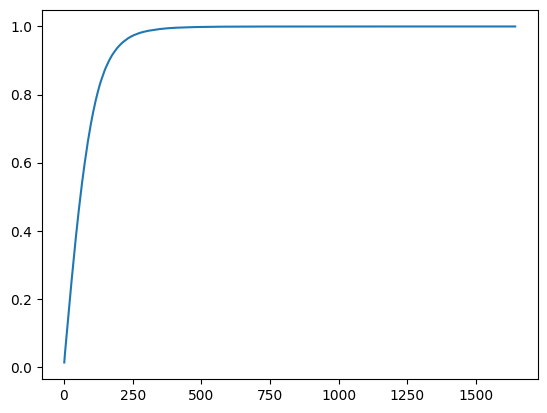

In [66]:
urls.value_counts(normalize=True).sort_index().cumsum().plot()

# price

In [72]:
sessions["price"].value_counts()

7990.0     3267622
15990.0    2801007
14990.0    2759324
10990.0    2677571
9990.0     2458607
            ...   
71528.0          1
33903.0          1
77323.0          1
32937.0          1
41184.0          1
Name: price, Length: 29322, dtype: int64

In [73]:
prices_by_smarts = sessions.groupby(["cpe_manufacturer_name", "cpe_model_name"])["price"].nunique()

In [77]:
prices_by_smarts[prices_by_smarts > 0]

cpe_manufacturer_name  cpe_model_name
Alcatel                1                  84
                       1S                  8
                       1X                 16
                       U5 3G Dual          4
Apple                  iPhone 11         908
                                        ... 
ZTE                    Blade A6            3
                       Blade A6 Lite       1
                       Blade L210RU        3
                       Blade L8           19
                       Blade V8            2
Name: price, Length: 439, dtype: int64

# date
кол-во уникальных дат

In [5]:
sessions["date"].min()

Timestamp('2021-06-16 00:00:00')

In [6]:
sessions["date"].max()

Timestamp('2022-11-01 00:00:00')

<Axes: >

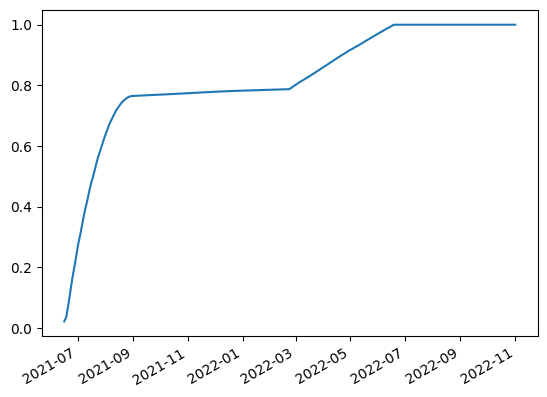

In [8]:
sessions["date"].value_counts(normalize=True).sort_index().cumsum().plot()

In [9]:
%%time
dates = sessions.groupby("user_id")["date"].nunique()

CPU times: user 1min 44s, sys: 7.25 s, total: 1min 51s
Wall time: 1min 51s


<Axes: >

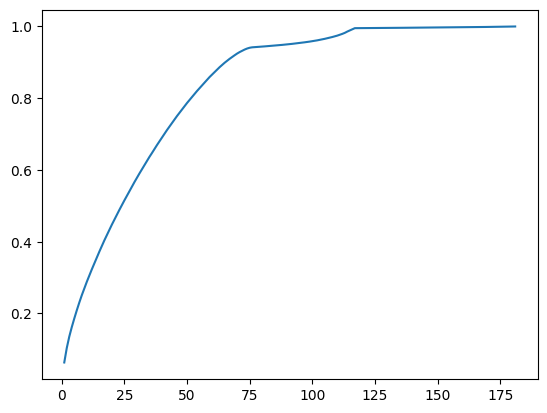

In [15]:
dates.value_counts(normalize=True).sort_index().cumsum().plot()

# part_of_day

In [17]:
sessions["part_of_day"].value_counts()

day        107328399
evening     96239286
morning     85236015
night       34095735
Name: part_of_day, dtype: int64

In [19]:
daypt = sessions.groupby("user_id")["part_of_day"].nunique()

In [21]:
daypt.value_counts(normalize=True)

4    0.795607
3    0.118379
2    0.051411
1    0.034602
Name: part_of_day, dtype: float64

In [23]:
sessions["request_cnt"].value_counts()

1     201324004
2      64345547
3      26781698
4      14887615
5       8360497
6       6665296
8        266005
10       156054
12       111868
7           788
9            29
11           17
14           14
16            2
13            1
Name: request_cnt, dtype: int64

In [34]:
%%time
sessions["part_of_day_str"] = sessions["part_of_day"].astype(str)

CPU times: user 28.8 s, sys: 23.1 s, total: 52 s
Wall time: 51.8 s


In [38]:
sessions.iloc[:100000].groupby(["user_id", "date", "part_of_day_str", "url_host"])["request_cnt"].nunique()

KeyboardInterrupt: 

In [37]:
sessions[(sessions["user_id"] == 1516) & (sessions["date"] == "2021-06-16")]

,region_name,city_name,cpe_manufacturer_name,cpe_model_name,url_host,cpe_type_cd,cpe_model_os_type,price,date,part_of_day,request_cnt,user_id,part_of_day_str
52200,Московская область,Балашиха,Realme Chongqing Mobile Telecommunications Cor...,6i,lenta.com,smartphone,Android,19990.0,2021-06-16,day,1,1516,day
52208,Московская область,Балашиха,Realme Chongqing Mobile Telecommunications Cor...,6i,sun9-17.userapi.com,smartphone,Android,19990.0,2021-06-16,day,2,1516,day
52214,Московская область,Балашиха,Realme Chongqing Mobile Telecommunications Cor...,6i,i.ytimg.com,smartphone,Android,19990.0,2021-06-16,day,5,1516,day
52244,Московская область,Балашиха,Realme Chongqing Mobile Telecommunications Cor...,6i,avatars.mds.yandex.net,smartphone,Android,19990.0,2021-06-16,day,4,1516,day
52253,Московская область,Балашиха,Realme Chongqing Mobile Telecommunications Cor...,6i,ads.betweendigital.com,smartphone,Android,19990.0,2021-06-16,day,2,1516,day
52258,Московская область,Балашиха,Realme Chongqing Mobile Telecommunications Cor...,6i,yandex.ru,smartphone,Android,19990.0,2021-06-16,day,6,1516,day
52263,Московская область,Балашиха,Realme Chongqing Mobile Telecommunications Cor...,6i,vk.com,smartphone,Android,19990.0,2021-06-16,morning,3,1516,morning
52265,Московская область,Балашиха,Realme Chongqing Mobile Telecommunications Cor...,6i,i.ytimg.com,smartphone,Android,19990.0,2021-06-16,morning,3,1516,morning
52268,Московская область,Балашиха,Realme Chongqing Mobile Telecommunications Cor...,6i,sun9-5.userapi.com,smartphone,Android,19990.0,2021-06-16,morning,1,1516,morning
52292,Московская область,Балашиха,Realme Chongqing Mobile Telecommunications Cor...,6i,sun9-29.userapi.com,smartphone,Android,19990.0,2021-06-16,morning,2,1516,morning


In [41]:
sessions = sessions.drop(columns="part_of_day_str")

In [42]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322899435 entries, 0 to 322899434
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   region_name            category      
 1   city_name              category      
 2   cpe_manufacturer_name  category      
 3   cpe_model_name         category      
 4   url_host               category      
 5   cpe_type_cd            category      
 6   cpe_model_os_type      category      
 7   price                  float32       
 8   date                   datetime64[ns]
 9   part_of_day            category      
 10  request_cnt            uint8         
 11  user_id                int32         
dtypes: category(8), datetime64[ns](1), float32(1), int32(1), uint8(1)
memory usage: 9.0 GB


In [ ]:
%%time
sessions = sessions.astype(
    {
        "region_name": "str",
        "city_name": "str",
        "cpe_manufacturer_name": "str",
        "cpe_model_name": "str",
        "url_host": "str",
        "cpe_type_cd": "str",
        "cpe_model_os_type": "str",
        "part_of_day": "str",
    }
)